In [ ]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 25.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import LabelEncoder


# Load dataset
dataset = pd.read_csv('/content/Prabhu/online_shoppers_intention.csv')

# Remove unwanted columns
dataset = dataset.drop(['Administrative','Administrative_Duration', 'Informational', 'Informational_Duration'], axis=1)


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['VisitorType'] = labelencoder.fit_transform(dataset['VisitorType'])
dataset['Month'] = labelencoder.fit_transform(dataset['Month'])
dataset['Weekend'] = labelencoder.fit_transform(dataset['Weekend'])
dataset['Revenue'] = labelencoder.fit_transform(dataset['Revenue'])

dataset

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


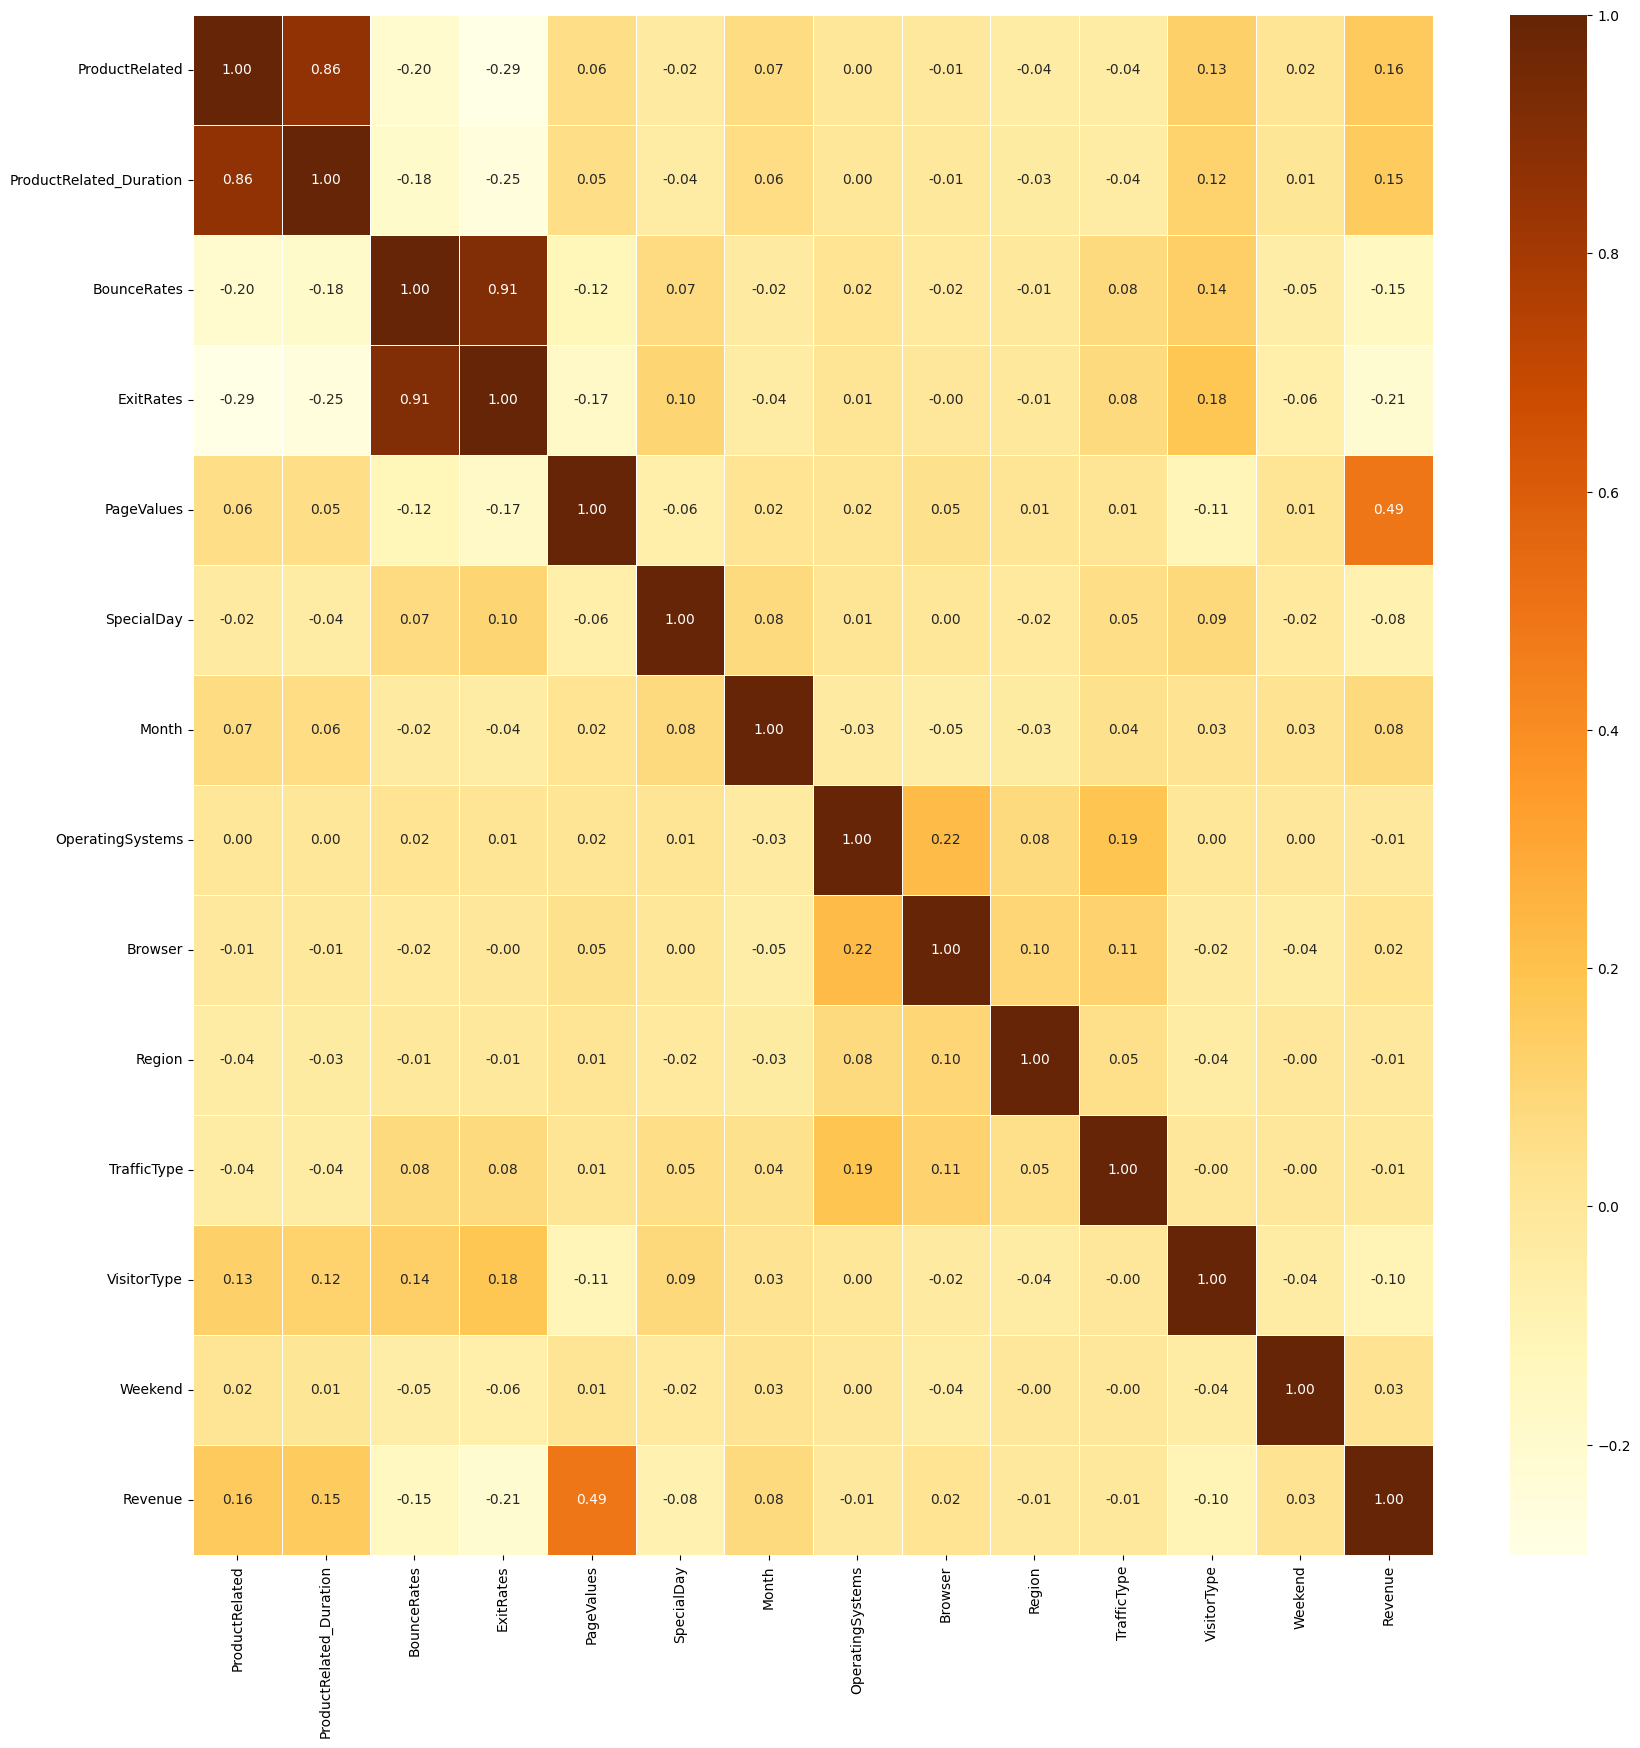

In [ ]:
pca = PCA(dataset, standardize=True, method='eig')
normalized_dataset = pca.transformed_data

# Covariance Matrix
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=dataset.columns)
# Plot Covariance Matrix
plt.subplots(figsize=(20, 20))
sns.heatmap(covariance_df, cmap='YlOrBr', linewidths=.7, annot=True, fmt='.2f', yticklabels=dataset.columns)
plt.show()

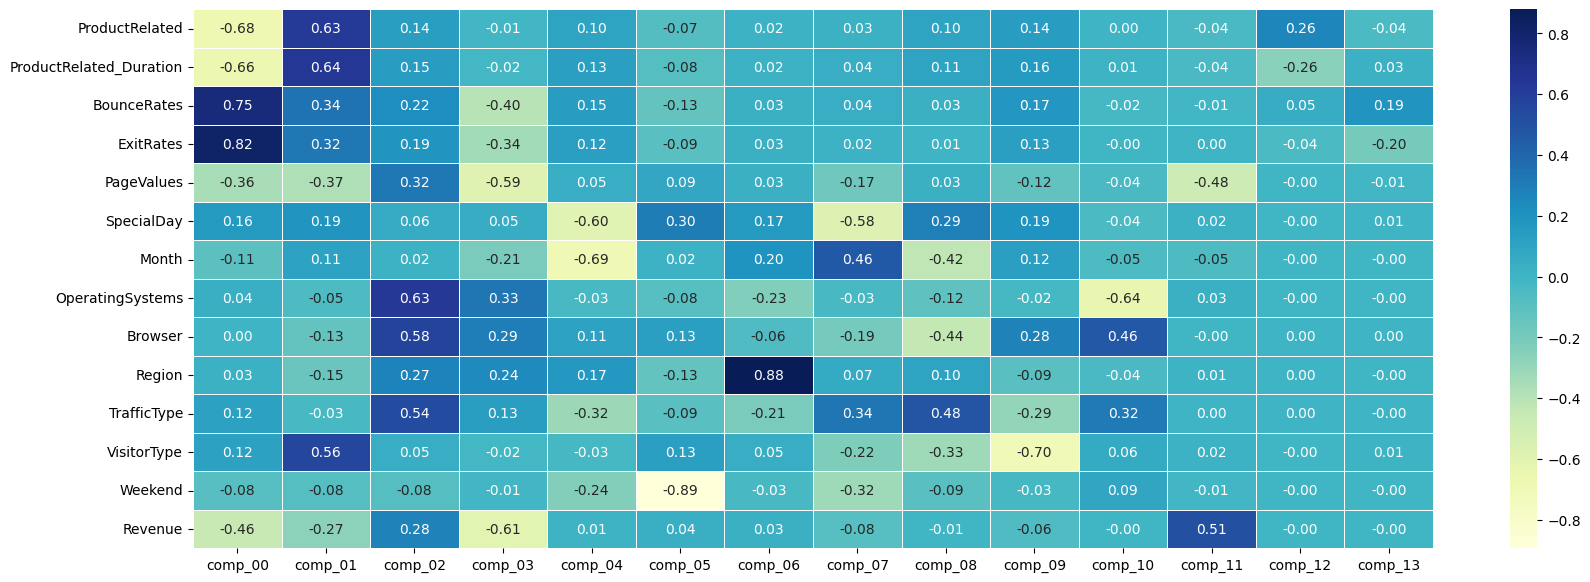

In [ ]:
components_df = pca.factors
combined_df = pd.concat([dataset, components_df], axis=1)
correlation = combined_df.corr()
# This matrix will have the correlation between:
# 1. feature vs features
# 2. feature vs principal component
# 3. principal component vs principal component
# We're removing part of the output to keep only the correlation between features and principal components
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

# plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [ ]:
pca = PCA(dataset, standardize=True, method='eig')

# Cumulative Variance Explained
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])
print(cumulative_variance_explained)

    cumulative_var
0         0.000000
1         0.182087
2         0.299508
3         0.400791
4         0.493906
5         0.572504
6         0.644157
7         0.711828
8         0.775975
9         0.836510
10        0.895519
11        0.949095
12        0.984463
13        0.994476
14        1.000000


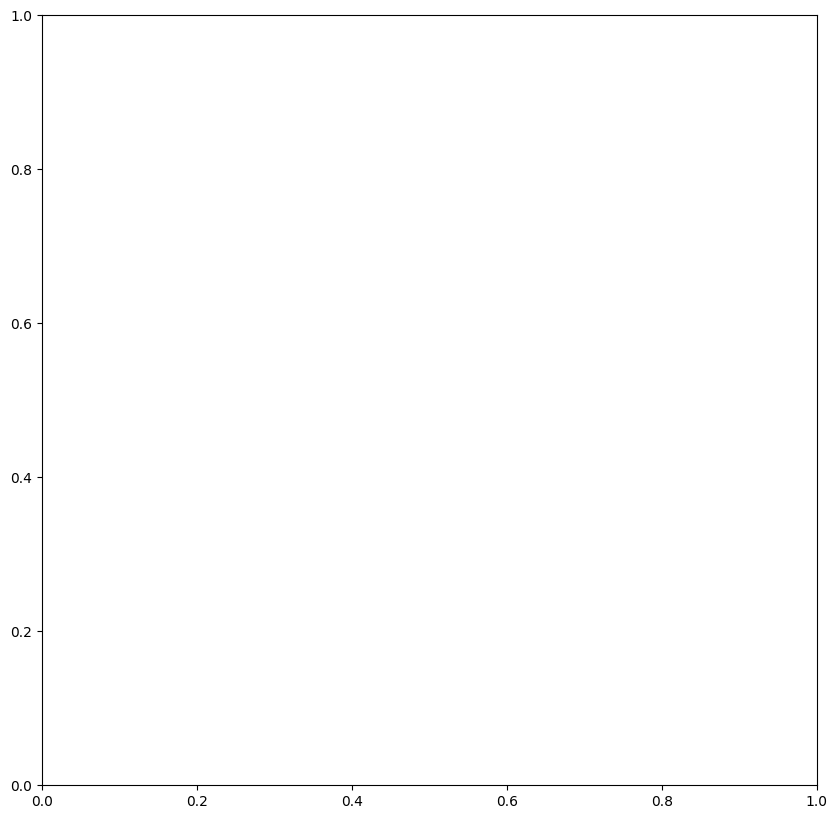

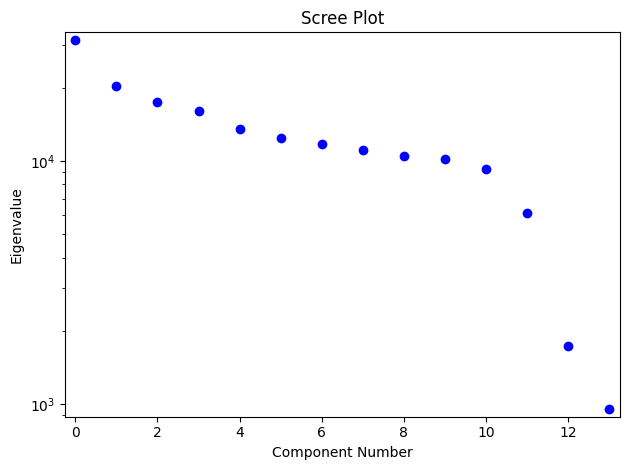

In [ ]:
plt.subplots(figsize=(10, 10))
pca.plot_scree()
plt.show()